**Importing libraries and visualizing data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import plot_confusion_matrix
import imblearn
print(imblearn.__version__)
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

df = pd.read_excel('Clinical Data.xlsx', sheet_name= "DATACOMPLETA") 
df.head(5) 

0.9.0


,Diagnostico,Genero,Edad,Escolaridad,IL_2,IL_6,IL_10,TNFa,SAP,CRP,...,T_ADLQ_I_Basic,T_ADLQ_I_Instrumental,T_ADLQ_I_Advanced,MiniSea_MiniSea_Total_FauxPas,MiniSea_MiniSea_Total_EkmanFaces,MiniSea_minisea_total,RCF_Time,RCF_Total_Score,TMT_A_Time,TMT_B_Time
0,0.0,M,78.0,12.0,0.000,0.245,5.29,14.05,4154.0,384.0,...,0.0,0.158730,0.750000,11.250,12.000,23.250,176.0,31.0,75.0,175.0
1,0.0,M,73.0,15.0,0.065,3.120,4.38,10.84,8826.0,8332.0,...,NaN,NaN,NaN,11.625,10.714,22.339,179.0,29.0,70.0,147.0
2,0.0,M,73.0,12.0,0.000,0.610,62.60,20.35,4700.0,19096.0,...,NaN,NaN,NaN,8.625,10.714,19.339,91.0,29.0,63.0,141.0
3,0.0,F,71.0,12.0,0.195,1.615,3.23,10.25,7558.0,21330.0,...,0.0,0.192982,0.333333,8.625,7.714,16.339,351.0,35.0,35.0,91.0
4,0.0,M,74.0,10.0,0.000,0.300,1.81,7.63,6508.0,436.0,...,0.0,0.092593,0.466667,12.000,12.429,24.429,125.0,32.0,72.0,128.0


**Saving and displaying rows with NAN's.**

In [2]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
print(rows_with_nan)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 20, 21, 24, 27, 42, 44, 51, 57, 61, 62, 63, 66, 82, 87, 88, 94, 98, 99, 100, 103, 110, 112, 117, 119, 120, 121, 123, 124, 128, 129, 130, 133, 134, 135, 141, 142, 143, 164, 169, 172, 177, 180, 183, 184, 186, 197, 198, 201, 203, 204, 205, 206, 207, 209, 210, 213, 214, 216, 217]


**Dropping NAN values**

In [3]:
df= df.dropna()
len(df)

147

**Encoding labels that have a "string" structure:**

In [4]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Genero'] = labelencoder.fit_transform(df['Genero'])
df['ApoE_genotipo'] = labelencoder.fit_transform(df['ApoE_genotipo'])
df['ApoE2masmenos'] = labelencoder.fit_transform(df['ApoE2masmenos'])
df['ApoE4masmenos'] = labelencoder.fit_transform(df['ApoE4masmenos'])
df['MAPT_genotipo'] = labelencoder.fit_transform(df['MAPT_genotipo'])
df.head(5)
#MALE = 1, FEMALE = 0

,Diagnostico,Genero,Edad,Escolaridad,IL_2,IL_6,IL_10,TNFa,SAP,CRP,...,T_ADLQ_I_Basic,T_ADLQ_I_Instrumental,T_ADLQ_I_Advanced,MiniSea_MiniSea_Total_FauxPas,MiniSea_MiniSea_Total_EkmanFaces,MiniSea_minisea_total,RCF_Time,RCF_Total_Score,TMT_A_Time,TMT_B_Time
0,0.0,1,78.0,12.0,0.00000,0.24500,5.2900,14.0500,4154.0,384.0,...,0.0,0.158730,0.750000,11.250,12.000,23.250,176.0,31.0,75.0,175.0
11,0.0,1,76.0,3.0,0.22455,0.00000,2.4318,3.6735,7742.0,1874.0,...,0.0,0.174603,0.333333,7.875,12.000,19.875,332.0,34.0,142.0,155.0
13,0.0,0,72.0,8.0,0.65110,0.00175,63.5570,8.2975,6024.0,16338.0,...,0.0,0.017544,0.000000,12.000,10.714,22.714,177.0,31.0,73.0,184.0
15,0.0,0,75.0,12.0,0.09315,1.78310,2.7463,10.2875,8774.0,45218.0,...,0.0,0.174603,0.416667,10.875,10.286,21.161,223.0,15.5,100.0,300.0
16,0.0,0,76.0,17.0,0.27530,0.00000,1.5492,7.4602,7092.0,2380.0,...,0.0,0.079365,0.200000,14.625,13.286,27.911,357.0,18.5,67.0,93.0


**Spliting Data "X" and "y":**

In [5]:
#Separación de la data
df_data = df.drop(['Diagnostico'],axis = 1)
df_target = df['Diagnostico']
X, y = df_data, df_target
X = X.values
y = y.values

**Oversampling the data so we have Balanced Data.**

Class=0, n=56 (25.000%)
Class=3, n=56 (25.000%)
Class=1, n=56 (25.000%)
Class=2, n=56 (25.000%)


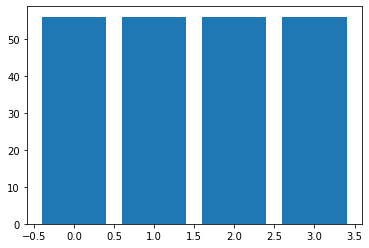

In [6]:
from imblearn.over_sampling import SMOTE
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
strategy = {0:56, 1:56, 2:56, 3:56}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**Definig cross-validation score and RandomForest classifier:**

In [7]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.927 (0.031)


**Train/Test split**

In [8]:
# Train/test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1121218
)

**Normalizing or Scaling Data**

In [9]:
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Elbow method to calculate K value graphically:** To set the optimum value of K here, I have used the elbow method; the plot below shows the error rate against 100 values of K. Error rate is calculated by taking the mean of where the predicted value is not equal to the actual value.

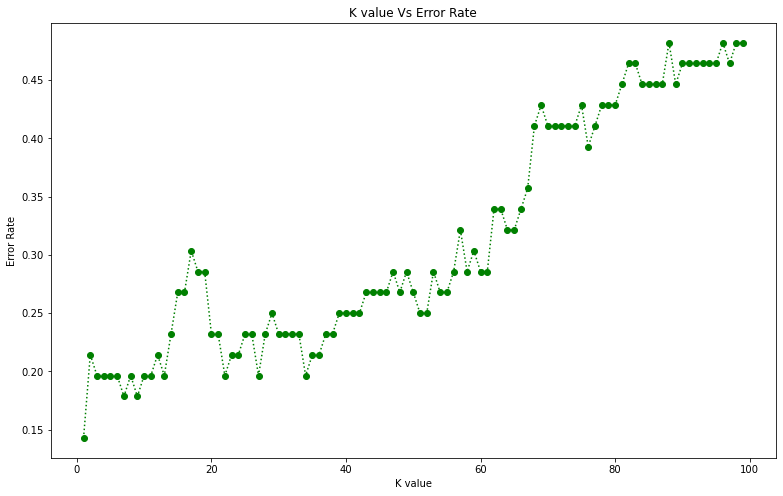

In [10]:
error_rate=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,100), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value Vs Error Rate')
plt.show() 

**Importing and testing KNN with a confusion matrix and different scoring methods: precision, recall, f1-score and support:**

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.82      0.69      0.75        13
           2       0.78      0.70      0.74        10
           3       1.00      1.00      1.00        13

    accuracy                           0.86        56
   macro avg       0.86      0.84      0.84        56
weighted avg       0.86      0.86      0.85        56



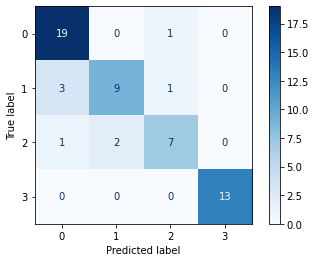

In [11]:
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors= 1 ).fit(x_train,y_train)
pred = model.predict(x_test)
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

**Importing and testing Decision Tree with a confusion matrix and different scoring methods: precision, recall, f1-score and support:**

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.75      0.92      0.83        13
           2       0.57      0.80      0.67        10
           3       0.80      0.62      0.70        13

    accuracy                           0.75        56
   macro avg       0.75      0.76      0.74        56
weighted avg       0.77      0.75      0.75        56



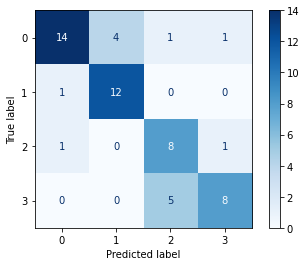

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

pred = dt.predict(x_test)
plot_confusion_matrix(dt,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

**Importing and testing GaussianNB (Naive Bayes) with a confusion matrix and different scoring methods: precision, recall, f1-score and support:**

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.75      0.46      0.57        13
           2       0.60      0.60      0.60        10
           3       0.72      1.00      0.84        13

    accuracy                           0.73        56
   macro avg       0.72      0.72      0.70        56
weighted avg       0.73      0.73      0.72        56



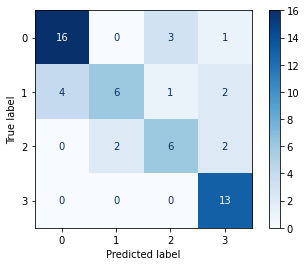

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

pred = gnb.predict(x_test)
plot_confusion_matrix(gnb,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))

**Importing and testing HistGradientBoostingClassifier with a confusion matrix and different scoring methods: precision, recall, f1-score and support:**

C:\ProgramData\Anaconda3\Conda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.73      0.85      0.79        13
           2       0.83      1.00      0.91        10
           3       1.00      0.92      0.96        13

    accuracy                           0.86        56
   macro avg       0.86      0.88      0.87        56
weighted avg       0.87      0.86      0.86        56



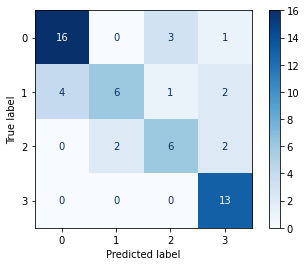

In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
hgb.fit(x_train,y_train)

pred = hgb.predict(x_test)
plot_confusion_matrix(gnb,x_test,y_test,cmap=plt.cm.Blues)
print(classification_report(y_test,pred))